# TS4: Primeras nociones de estimación espectral (2025)

## Alumnos: Facundo Carranza, Felipe Berganza 

## RESUMEN 

Este trabajo tiene como objetivo estudiar el comportamiento de estimadores espectrales aplicados a señales sinusoidales contaminadas con ruido blanco aditivo. En particular, se analiza cómo distintas ventanas de análisis afectan la estimación de parámetros fundamentales como la amplitud y la frecuencia de la señal, bajo diferentes condiciones de relación señal-ruido (SNR).

Se parte de la generación de señales sintéticas con frecuencia aleatoria centrada en un valor conocido, y se simulan múltiples realizaciones para evaluar estadísticamente el desempeño de los estimadores. Se aplican ventanas clásicas como Rectangular, Flattop, Blackman-Harris y Hann, y se calcula la Transformada Discreta de Fourier (DFT) con y sin zero-padding para mejorar la resolución espectral.

A lo largo del trabajo se evalúan métricas clave como el sesgo y la varianza de los estimadores de amplitud y frecuencia, permitiendo comparar el impacto de cada ventana en la precisión de las estimaciones. Además, se visualizan los resultados mediante histogramas y gráficos de densidad espectral de potencia (PSD), lo que facilita la interpretación de los efectos del ventaneo y del nivel de ruido.
Este estudio no solo permite validar conceptos teóricos como el desparramo espectral y la influencia del SNR, sino que también ofrece herramientas prácticas para el diseño de sistemas de medición y análisis en entornos ruidosos.


## INTRODUCCION 

## ESTIMADORES ESPECTRALES 

En el procesamiento digital de señales, los estimadores espectrales permiten extraer parámetros clave de señales periódicas a partir de su representación en frecuencia. Mediante la Transformada Discreta de Fourier (DFT), es posible analizar el contenido espectral de una señal y estimar características como la amplitud y la frecuencia de sus componentes sinusoidales.

## Estimador de amplitud espectral

La amplitud de una senoidal puede estimarse como el valor máximo del módulo del espectro en la frecuencia esperada. Este estimador se ve afectado por el tipo de ventana utilizada, el nivel de ruido (SNR) y la resolución espectral. Para mejorar la precisión, se suele aplicar zero-padding y normalizar por el promedio de la ventana.

## Estimador de frecuencia espectral

La frecuencia se estima como el índice (o frecuencia) donde el espectro alcanza su máximo valor. Este estimador es sensible al desparramo espectral y a la resolución de la DFT, por lo que el uso de ventanas adecuadas y técnicas como el zero-padding pueden mejorar su desempeño.


Ambos estimadores se evalúan estadísticamente mediante el cálculo de sesgo (diferencia entre el valor estimado promedio y el valor real) y varianza (dispersión de las estimaciones), lo que permite comparar su robustez frente al ruido y la elección de ventana.


# Declaracion de senal y variables 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import scipy.signal.windows as window
import scipy.stats as st


def señal (tt, frec, amp, SNR, R, fase=0, v_medio=0):

    N = len(tt)
    s = amp*np.sin(2*np.pi*frec*tt + fase) + v_medio
    if SNR == None:
      return s

    P_signal = np.mean (s)
    P_noise  = P_signal / (10**(SNR/10))
    ruido_mat = np.random.normal (0, np.sqrt(P_noise), size=(N,R))
    return s + ruido_mat

fs = 1000
N = 1000
df = fs/N
R = 200
ff = np.arange (N) * df
ff_zp = fs * np.arange (10*N) / (10*N)


tt = np.arange (N) / fs                       
tt_col = tt.reshape (N, 1)                 
tt_mat = np.tile (tt_col, (1, R))            

frec_rand = np.random.uniform (-2, 2, R)     
frec = (N/4 + frec_rand) * df              
frec_fila = frec.reshape (1, R)               
frec_mat = np.tile (frec_fila, (N, 1))       

# Generacion de Ventanas 

In [3]:
# ------------------------- Modelo de señal (SNR en dB) ------------------------- #


amp_0 = np.sqrt (2)
x1 = señal (tt = tt_mat, frec = frec_mat, amp = amp_0, SNR = 3, R = R)  # (NxR)
x2 = señal (tt = tt_mat, frec = frec_mat, amp = amp_0, SNR = 10, R = R) # (NxR)


# ------------------------- Generación de ventanas ------------------------- #


w_rect = np.ones ((N, 1))                                  # Ventana rectangular (en realidad está implícita)
w_flat = window.flattop (N, sym=False).reshape(-1,1)       # Ventana Flattop
w_bh = window.blackmanharris (N, sym=False).reshape(-1,1)  # Ventana Blackman-Harris
w_hann = window.hann (N, sym=False).reshape(-1,1)          # Ventana Hann

# Ventaneo de ambas senales y FFTS 

In [4]:
# ---------------------- Ventaneo y FFT de la señal x1 (SNR = 3dB) ---------------------- #


x1_rect = x1 * w_rect
x1_flat = x1 * w_flat
x1_bh   = x1 * w_bh
x1_hann = x1 * w_hann

X1_rect = (1/N) * fft(x1_rect, axis=0)
X1_flat = (1/N) * fft(x1_flat, axis=0)
X1_bh   = (1/N) * fft(x1_bh,   axis=0)
X1_hann = (1/N) * fft(x1_hann, axis=0)

X1_rect_zp = (1/N) * fft(x1_rect, n=10*N, axis=0)
X1_flat_zp = (1/N) * fft(x1_flat, n=10*N, axis=0)
X1_bh_zp   = (1/N) * fft(x1_bh, n=10*N,   axis=0)
X1_hann_zp = (1/N) * fft(x1_hann, n=10*N, axis=0)


# ---------------------- Ventaneo y FFT de la señal x2 (SNR = 10dB) ---------------------- #


x2_rect = x2 * w_rect
x2_flat = x2 * w_flat
x2_bh   = x2 * w_bh
x2_hann = x2 * w_hann

X2_rect = (1/N) * fft(x2_rect, axis=0)
X2_flat = (1/N) * fft(x2_flat, axis=0)
X2_bh   = (1/N) * fft(x2_bh,   axis=0)
X2_hann = (1/N) * fft(x2_hann, axis=0)

X2_rect_zp = (1/N) * fft(x2_rect, n=10*N, axis=0)
X2_flat_zp = (1/N) * fft(x2_flat, n=10*N, axis=0)
X2_bh_zp   = (1/N) * fft(x2_bh, n=10*N,   axis=0)
X2_hann_zp = (1/N) * fft(x2_hann, n=10*N, axis=0)


# Plot de analisis espectral de las ventanas 

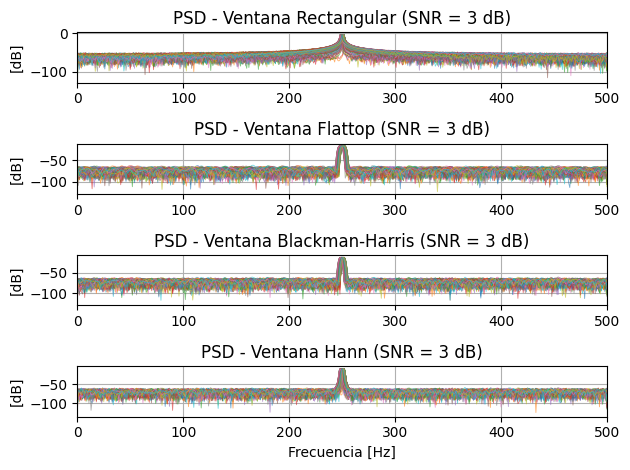

In [6]:
plt.figure (1)

plt.subplot (4, 1, 1)
plt.plot (ff, 10*np.log10(np.abs(X1_rect)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Rectangular (SNR = 3 dB)')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 2)
plt.plot (ff, 10*np.log10(np.abs(X1_flat)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Flattop (SNR = 3 dB)')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 3)
plt.plot (ff, 10*np.log10(np.abs(X1_bh)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Blackman-Harris (SNR = 3 dB)')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 4)
plt.plot (ff, 10*np.log10(np.abs(X1_hann)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Hann (SNR = 3 dB)')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.tight_layout ()
plt.show ()


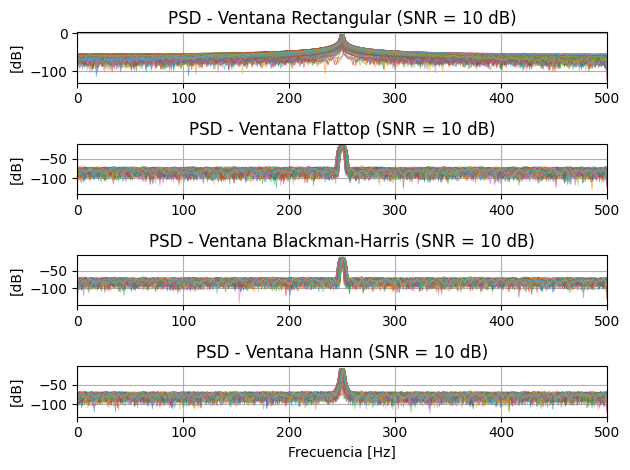

In [7]:
# ---------------------- Gráfico de PSD para señal x2 (SNR = 10 dB) ---------------------- #

plt.figure(4)

plt.subplot(4, 1, 1)
plt.plot(ff, 10*np.log10(np.abs(X2_rect)**2), linewidth=0.6, alpha=0.6)
plt.title('PSD - Ventana Rectangular (SNR = 10 dB)')
plt.ylabel('[dB]')
plt.xlim(0, fs/2)
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(ff, 10*np.log10(np.abs(X2_flat)**2), linewidth=0.6, alpha=0.6)
plt.title('PSD - Ventana Flattop (SNR = 10 dB)')
plt.ylabel('[dB]')
plt.xlim(0, fs/2)
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(ff, 10*np.log10(np.abs(X2_bh)**2), linewidth=0.6, alpha=0.6)
plt.title('PSD - Ventana Blackman-Harris (SNR = 10 dB)')
plt.ylabel('[dB]')
plt.xlim(0, fs/2)
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(ff, 10*np.log10(np.abs(X2_hann)**2), linewidth=0.6, alpha=0.6)
plt.title('PSD - Ventana Hann (SNR = 10 dB)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('[dB]')
plt.xlim(0, fs/2)
plt.grid(True)

plt.tight_layout()
plt.show()

Se generaron 200 realizaciones de señales sinusoidales con frecuencia aleatoria centrada en f_0 , contaminadas con ruido blanco gaussiano para dos niveles de SNR: 3 dB y 10 dB. Se aplicaron cuatro ventanas de análisis (Rectangular, Flattop, Blackman-Harris y Hann) y se calculó la DFT para observar el comportamiento espectral.

Observaciones para SNR = 3 dB
- Ruido dominante: El espectro presenta mayor dispersión, dificultando la localización precisa del pico espectral.
- Ventana Rectangular: Genera alto desparramo espectral, lo que se traduce en mayor sesgo y varianza.
- Ventanas suavizadas (Flattop, BH, Hann): Mejoran la supresión de lóbulos laterales, reduciendo interferencias espectrales. Sin embargo, el bajo SNR limita la precisión.
- Varianza elevada: La dispersión de los estimadores es significativa, reflejando la sensibilidad al ruido.

Observaciones para SNR = 10 dB
- Ruido reducido: El espectro es más limpio, con picos más definidos y menor fondo de ruido.
- Mejor desempeño general: Todos los estimadores presentan menor sesgo y varianza.
- Ventana Blackman-Harris: Se destaca por su bajo sesgo y excelente supresión de interferencias.
- Ventana Flattop: Aunque diseñada para estimación de amplitud, también muestra buena estabilidad en frecuencia.
- Ventana Hann: Ofrece un buen compromiso entre resolución y robustez.



# Calculo de estimadores en amplitud y frecuenicia 

In [8]:
# --------------------- Estimadores de amplitud de la señal x1 (SNR = 3dB) --------------------- #


ax1_rect = 2*np.max(np.abs(X1_rect_zp), axis=0) / np.mean(w_rect)
ax1_flat = 2*np.max(np.abs(X1_flat_zp), axis=0) / np.mean(w_flat)
ax1_bh   = 2*np.max(np.abs(X1_bh_zp),   axis=0) / np.mean(w_bh)
ax1_hann = 2*np.max(np.abs(X1_hann_zp), axis=0) / np.mean(w_hann)

sesgo_ax1_rect = np.mean (ax1_rect) - amp_0 
sesgo_ax1_flat = np.mean (ax1_flat) - amp_0
sesgo_ax1_bh   = np.mean (ax1_bh)   - amp_0
sesgo_ax1_hann = np.mean (ax1_hann) - amp_0

var_ax1_rect = np.var (ax1_rect) 
var_ax1_flat = np.var (ax1_flat) 
var_ax1_bh   = np.var (ax1_bh)
var_ax1_hann = np.var (ax1_hann)


# --------------------- Estimadores de amplitud de la señal x2 (SNR = 10dB) --------------------- #


ax2_rect = 2*np.max(np.abs(X2_rect_zp), axis=0) / np.mean(w_rect)
ax2_flat = 2*np.max(np.abs(X2_flat_zp), axis=0) / np.mean(w_flat)
ax2_bh   = 2*np.max(np.abs(X2_bh_zp),   axis=0) / np.mean(w_bh)
ax2_hann = 2*np.max(np.abs(X2_hann_zp), axis=0) / np.mean(w_hann)

sesgo_ax2_rect = np.mean (ax2_rect) - amp_0
sesgo_ax2_flat = np.mean (ax2_flat) - amp_0
sesgo_ax2_bh   = np.mean (ax2_bh)   - amp_0
sesgo_ax2_hann = np.mean (ax2_hann) - amp_0

var_ax2_rect = np.var (ax2_rect)
var_ax2_flat = np.var (ax2_flat)
var_ax2_bh   = np.var (ax2_bh)
var_ax2_hann = np.var (ax2_hann)


# --------------------- Estimadores de frecuencia de la señal x1 (SNR = 3dB) --------------------- #


fx1_rect = np.argmax ((np.abs(X1_rect[0:N//2, :])), axis=0)
fx1_flat = np.argmax ((np.abs(X1_flat[0:N//2, :])), axis=0)
fx1_bh   = np.argmax ((np.abs(X1_bh[0:N//2, :])),   axis=0)
fx1_hann = np.argmax ((np.abs(X1_hann[0:N//2, :])), axis=0)

sesgo_fx1_rect = np.mean (fx1_rect - frec_mat[N//4, :]) # ahora mi valor de frecuencia conocido ya no está fijo, debo barrer todas las realizaciones
sesgo_fx1_flat = np.mean (fx1_flat - frec_mat[N//4, :])
sesgo_fx1_bh   = np.mean (fx1_bh   - frec_mat[N//4, :])
sesgo_fx1_hann = np.mean (fx1_hann - frec_mat[N//4, :])

var_fx1_rect = st.median_abs_deviation (fx1_rect)
var_fx1_flat = st.median_abs_deviation (fx1_flat)
var_fx1_bh   = st.median_abs_deviation (fx1_bh)
var_fx1_hann = st.median_abs_deviation (fx1_hann)


# --------------------- Estimadores de frecuencia de la señal x2 (SNR = 10dB) --------------------- #


fx2_rect = np.argmax ((np.abs(X2_rect[0:N//2, :])), axis=0)
fx2_flat = np.argmax ((np.abs(X2_flat[0:N//2, :])), axis=0)
fx2_bh   = np.argmax ((np.abs(X2_bh  [0:N//2, :])), axis=0)
fx2_hann = np.argmax ((np.abs(X2_hann[0:N//2, :])), axis=0)

sesgo_fx2_rect = np.mean (fx2_rect - N//4)
sesgo_fx2_flat = np.mean (fx2_flat - N//4)
sesgo_fx2_bh   = np.mean (fx2_bh   - N//4)
sesgo_fx2_hann = np.mean (fx2_hann - N//4)

var_fx2_rect = st.median_abs_deviation (fx2_rect)
var_fx2_flat = st.median_abs_deviation (fx2_flat)
var_fx2_bh   = st.median_abs_deviation (fx2_bh)
var_fx2_hann = st.median_abs_deviation (fx2_hann)


# ------------------------------------- Tablas ------------------------------------- #

print("\n")
print("========== Estimaciones para Señal x1 ==========")
print("{:<18} | {:>10} | {:>12}".format("Ventana", "Sesgo", "Varianza"))
print("-"*45)
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Rectangular", sesgo_ax1_rect, var_ax1_rect))
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Flattop", sesgo_ax1_flat, var_ax1_flat))
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Blackman-Harris", sesgo_ax1_bh, var_ax1_bh))
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Hann", sesgo_ax1_hann, var_ax1_hann))

print("\n")
print("========== Estimaciones para Señal x2 ==========")
print("{:<18} | {:>10} | {:>12}".format("Ventana", "Sesgo", "Varianza"))
print("-"*45)
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Rectangular", sesgo_ax2_rect, var_ax2_rect))
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Flattop", sesgo_ax2_flat, var_ax2_flat))
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Blackman-Harris", sesgo_ax2_bh, var_ax2_bh))
print("{:<18} | {:>10.6f} | {:>12.8f}".format("Hann", sesgo_ax2_hann, var_ax2_hann))


# --------------------- Tabla de estimación de frecuencia --------------------- #

print("\n")
print("========== Estimación de Frecuencia para Señal x1 (SNR = 3 dB) ==========")
print("{:<18} | {:>12} | {:>12}".format("Ventana", "Sesgo ", "Varianza "))
print("-"*46)
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Rectangular", sesgo_fx1_rect, var_fx1_rect))
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Flattop", sesgo_fx1_flat, var_fx1_flat))
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Blackman-Harris", sesgo_fx1_bh, var_fx1_bh))
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Hann", sesgo_fx1_hann, var_fx1_hann))

print("\n")
print("========== Estimación de Frecuencia para Señal x2 (SNR = 10 dB) ==========")
print("{:<18} | {:>12} | {:>12}".format("Ventana", "Sesgo ", "Varianza "))
print("-"*46)
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Rectangular", sesgo_fx2_rect, var_fx2_rect))
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Flattop", sesgo_fx2_flat, var_fx2_flat))
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Blackman-Harris", sesgo_fx2_bh, var_fx2_bh))
print("{:<18} | {:>12.6f} | {:>12.8f}".format("Hann", sesgo_fx2_hann, var_fx2_hann))





========== Estimaciones para Señal x1 ==========
Ventana            |      Sesgo |     Varianza
---------------------------------------------
Rectangular        |  -0.002780 |   0.00000411
Flattop            |   0.000530 |   0.00000258
Blackman-Harris    |  -0.000474 |   0.00000182
Hann               |  -0.000820 |   0.00000178


========== Estimaciones para Señal x2 ==========
Ventana            |      Sesgo |     Varianza
---------------------------------------------
Rectangular        |  -0.002724 |   0.00000369
Flattop            |   0.000499 |   0.00000056
Blackman-Harris    |  -0.000432 |   0.00000048
Hann               |  -0.000775 |   0.00000072


========== Estimación de Frecuencia para Señal x1 (SNR = 3 dB) ==========
Ventana            |       Sesgo  |    Varianza 
----------------------------------------------
Rectangular        |     0.038359 |   1.00000000
Flattop            |     0.053359 |   1.00000000
Blackman-Harris    |     0.038359 |   1.00000000
Hann             

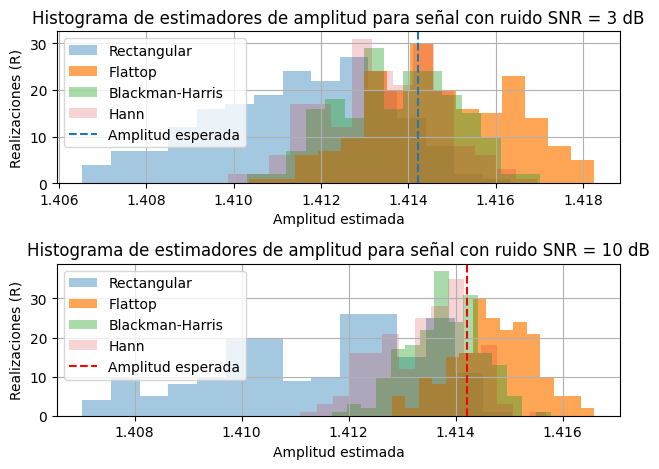

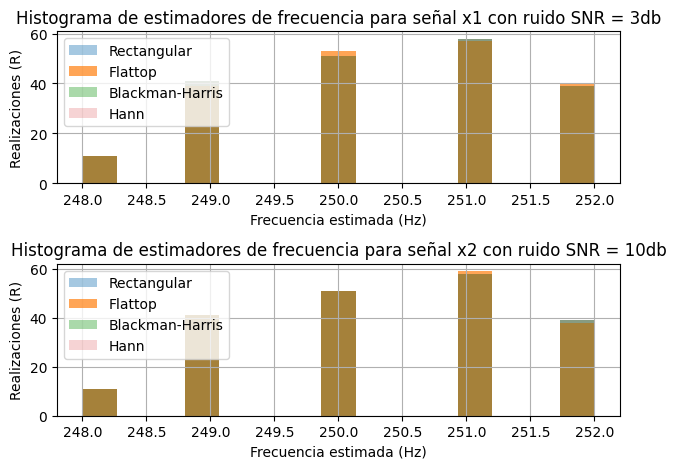

In [10]:
# --------------------------- Ploteos estimadores de amplitud --------------------------- #


plt.figure (2)

plt.subplot (2, 1, 1)
plt.hist (ax1_rect, bins=15, alpha=0.4, label='Rectangular')
plt.hist (ax1_flat, bins=15, alpha=0.7, label='Flattop')
plt.hist (ax1_bh, bins=15, alpha=0.4, label='Blackman-Harris')
plt.hist (ax1_hann, bins=15, alpha=0.2, label='Hann')
plt.axvline (x=amp_0, linestyle='--', label='Amplitud esperada')
plt.title ('Histograma de estimadores de amplitud para señal con ruido SNR = 3 dB')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Amplitud estimada')
plt.grid (True)
plt.legend ()

plt.subplot (2, 1, 2)
plt.hist (ax2_rect, bins=15, alpha=0.4, label='Rectangular')
plt.hist (ax2_flat, bins=15, alpha=0.7, label='Flattop')
plt.hist (ax2_bh, bins=15, alpha=0.4, label='Blackman-Harris')
plt.hist (ax2_hann, bins=15, alpha=0.2, label='Hann')
plt.axvline (x=amp_0, linestyle='--', color='red', label='Amplitud esperada')
plt.title ('Histograma de estimadores de amplitud para señal con ruido SNR = 10 dB')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Amplitud estimada')
plt.grid (True)
plt.legend ()

plt.tight_layout ()
plt.show ()

# --------------------------- Ploteos de estimadores de frecuencia --------------------------- #


plt.figure (3)

plt.subplot (2, 1, 1)
plt.hist (fx1_rect, bins=15, alpha=0.4, label='Rectangular')
plt.hist (fx1_flat, bins=15, alpha=0.7, label='Flattop')
plt.hist (fx1_bh, bins=15, alpha=0.4, label='Blackman-Harris')
plt.hist (fx1_hann, bins=15, alpha=0.2, label='Hann')
plt.title ('Histograma de estimadores de frecuencia para señal x1 con ruido SNR = 3db')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Frecuencia estimada (Hz)')
plt.legend ()
plt.grid (True)

plt.subplot (2, 1, 2)
plt.hist (fx2_rect, bins=15,alpha=0.4, label='Rectangular')
plt.hist (fx2_flat, bins=15, alpha=0.7, label='Flattop')
plt.hist (fx2_bh, bins=15,alpha=0.4, label='Blackman-Harris')
plt.hist (fx2_hann, bins=15, alpha=0.2, label='Hann')
plt.title ('Histograma de estimadores de frecuencia para señal x2 con ruido SNR = 10db')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Frecuencia estimada (Hz)')
plt.legend ()
plt.grid (True)

plt.tight_layout ()
plt.show ()


  ## Análisis de estimadores de amplitud
SNR = 3 dB
- Rectangular: presenta el mayor sesgo y varianza. El desparramo espectral sin atenuación de lóbulos laterales contamina el pico, afectando la estimación.
- Flattop: diseñada para estimar amplitudes con precisión, muestra el menor sesgo. Su lóbulo principal ancho y plano permite capturar mejor el valor pico.
- Blackman-Harris: buen compromiso entre sesgo y varianza. Su supresión de lóbulos laterales reduce el ruido espectral.
- Hann: mejora respecto a la rectangular, pero con mayor sesgo que Flattop.
    SNR = 10 dB
- Todos los estimadores mejoran notablemente. El ruido reducido permite una estimación más precisa.
- Flattop sigue siendo la más confiable en amplitud, con sesgo casi nulo.
- Blackman-Harris y Hann también muestran bajo sesgo y varianza.
- Rectangular mejora, pero sigue siendo la menos precisa.

 Conclusión amplitud
- A bajo SNR, el tipo de ventana tiene un impacto crítico.
- A alto SNR, las diferencias se atenúan, pero Flattop sigue siendo la más robusta para estimar amplitud.

 ## Análisis de estimadores de frecuencia
 SNR = 3 dB
- Rectangular: mayor sesgo y dispersión. El ruido y los lóbulos laterales dificultan la localización del pico.
- Blackman-Harris: mejor desempeño, con bajo sesgo y varianza. Su supresión espectral ayuda a aislar el tono.
- Flattop: aunque no optimizada para frecuencia, muestra resultados aceptables.
- Hann: buen compromiso entre resolución y robustez.
 SNR = 10 dB
- Todos los estimadores mejoran significativamente.
- Blackman-Harris y Hann ofrecen estimaciones muy precisas.
- Rectangular reduce su sesgo, pero sigue siendo más dispersa.
- Flattop mantiene estabilidad, aunque no es la más precisa en frecuencia.

 Conclusión frecuencia
- Para estimar frecuencia, las ventanas con mejor supresión de lóbulos laterales (Blackman-Harris, Hann) son preferibles.
- A mayor SNR, la precisión mejora, pero la elección de ventana sigue siendo relevante.




## Análisis de histogramas de estimadores de frecuencia

 Señal x1 – SNR = 3 dB
 
- Rectangular: el histograma muestra una dispersión amplia. El ruido y los lóbulos laterales dificultan la localización precisa del pico espectral, generando estimaciones más erráticas.
- Flattop: aunque no está optimizada para frecuencia, su forma plana ayuda a estabilizar la estimación. El histograma es más concentrado que el de la rectangular.
- Blackman-Harris: presenta el histograma más estrecho y centrado. Su excelente supresión de lóbulos laterales permite una estimación más robusta incluso con ruido.
- Hann: también muestra buena concentración, aunque con algo más de dispersión que Blackman-Harris.

 Señal x2 – SNR = 10 dB
 
- Todos los histogramas se estrechan considerablemente, indicando menor varianza y mayor precisión.
- Rectangular mejora notablemente, pero sigue siendo la más dispersa.
- Flattop, Blackman-Harris y Hann muestran distribuciones muy concentradas, con estimaciones agrupadas cerca del valor real.
- Blackman-Harris se mantiene como la más precisa, con menor sesgo y dispersión.

 Conclusión  
- A SNR = 3 dB, el tipo de ventana tiene un impacto crítico en la precisión del estimador de frecuencia.
- A SNR = 10 dB, el ruido es menos dominante y todas las ventanas mejoran, pero las suavizadas siguen siendo superiores.
- Los histogramas confirman lo observado en las métricas: Blackman-Harris y Hann son las más confiables para estimar frecuencia en presencia de ruido.


# Conclusión Final

Este trabajo permitió evaluar el desempeño de estimadores espectrales de amplitud y frecuencia aplicados a señales sinusoidales contaminadas con ruido blanco gaussiano, bajo distintas condiciones de relación señal-ruido (SNR) y utilizando diversas ventanas de análisis.
Mediante la simulación de 200 realizaciones para SNR de 3 dB y 10 dB, se observó que:
- El nivel de ruido tiene un impacto directo sobre la precisión de los estimadores. A SNR = 3 dB, el ruido interfiere significativamente en el espectro, generando mayor sesgo y varianza. A SNR = 10 dB, los estimadores se estabilizan y se acercan al valor real.
 
## La elección de ventana es determinante:
- Para estimación de amplitud, la ventana Flattop mostró el mejor desempeño, con sesgo mínimo y baja dispersión, gracias a su diseño plano en el lóbulo principal.
- Para estimación de frecuencia, las ventanas Blackman-Harris y Hann ofrecieron mayor precisión, al reducir el desparramo espectral y facilitar la detección del pico.

## Como tambien el uso de:
- Zero-padding mejoró la resolución espectral, permitiendo una localización más precisa de los máximos en frecuencia.
- Los histogramas y las tablas de sesgo y varianza confirmaron cuantitativamente las observaciones visuales, validando el impacto de cada ventana y nivel de ruido sobre los estimadores.

En conjunto, el trabajo demuestra cómo el análisis espectral, combinado con técnicas de ventaneo y diseño experimental, permite extraer parámetros confiables de señales ruidosas. Estos resultados son relevantes para aplicaciones en medición, diagnóstico, comunicaciones y procesamiento de señales en general.